# K-Means

### Are there different types of breast cancer? Is there a unique cluster with malignant tumors?

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Preparing the data

In [2]:
df = pd.read_csv('Cancer_Data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Normalize the data & standarize features

In [4]:
# Transforming the 'diagnosis' column to numeric
df['diagnosis_num'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Droping non-numeric columns for clustering
X = df.drop(['diagnosis', 'diagnosis_num'], axis=1)

# Normalizing the data
data = df.copy()
X = data.drop(columns=['diagnosis', 'diagnosis_num'])
y = data['diagnosis_num']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

### Choosing optimal K

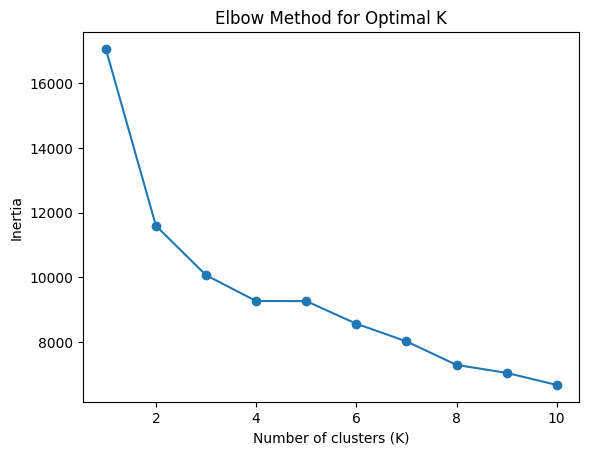

In [5]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

### K = 2

In [6]:
# K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df['cluster'] = clusters

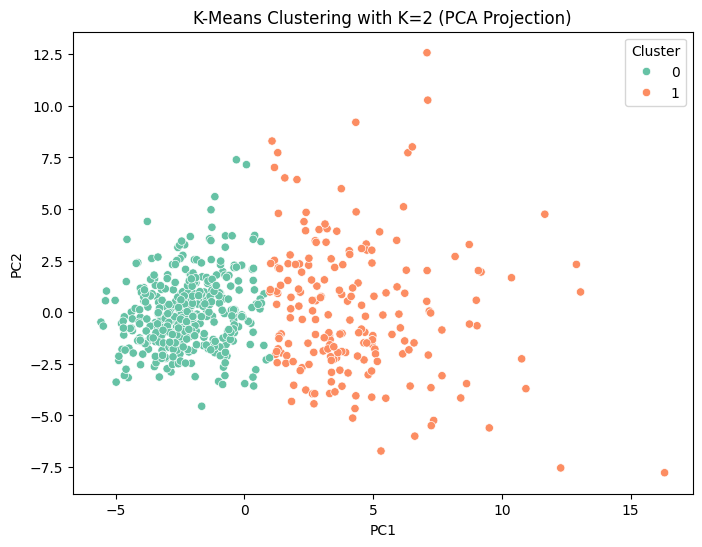

In [7]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("K-Means Clustering with K=2 (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

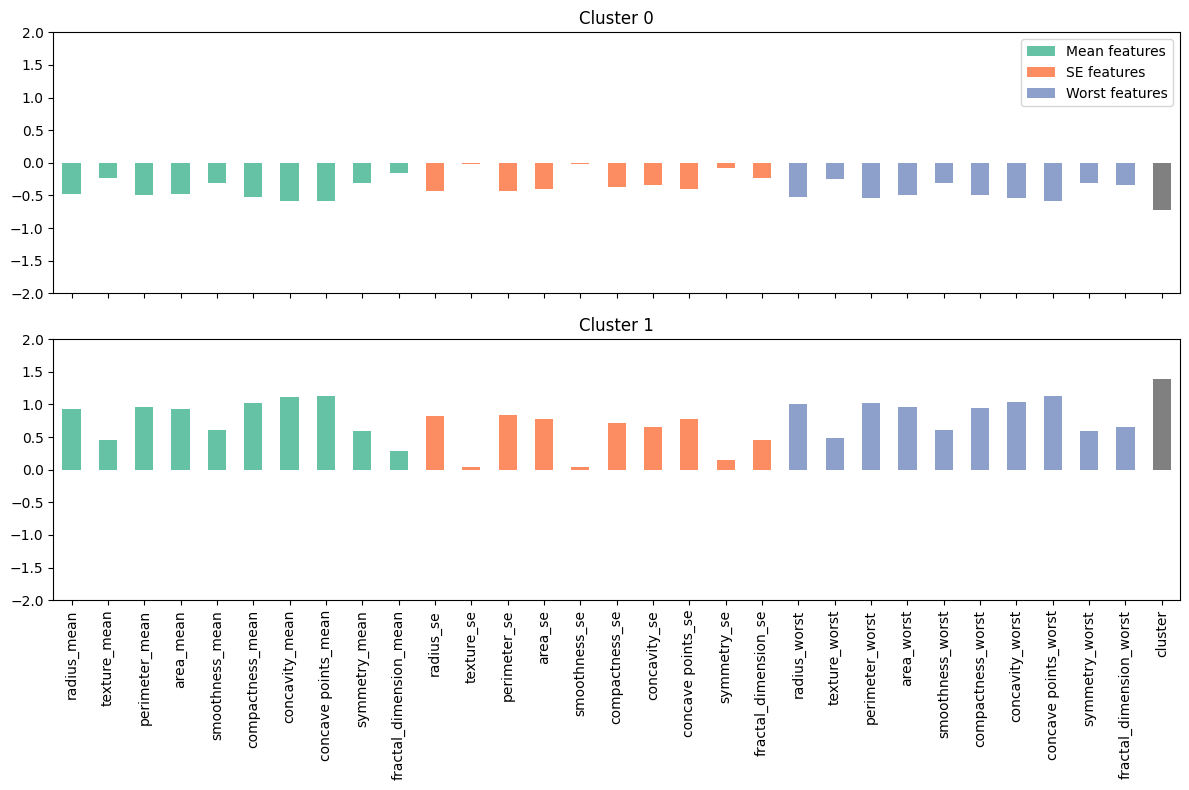

In [ ]:
# Calculate mean feature values per cluster
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Cluster'] = clusters
cluster_means = X_scaled_df.groupby('Cluster').mean().T

set2_palette = sns.color_palette("Set2", 3)
mean_color = set2_palette[0]    # greenish
se_color = set2_palette[1]      # orange
worst_color = set2_palette[2]   # purple

# Define feature groups
mean_features = [col for col in cluster_means.index if '_mean' in col]
se_features = [col for col in cluster_means.index if '_se' in col]
worst_features = [col for col in cluster_means.index if '_worst' in col]

colors = []
for feat in cluster_means.index:
    if feat in mean_features:
        colors.append(mean_color)
    elif feat in se_features:
        colors.append(se_color)
    elif feat in worst_features:
        colors.append(worst_color)
    else:
        colors.append('gray')

fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

for i, ax in enumerate(axes):
    cluster_means[i].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Cluster {i}')
    ax.set_ylim(-2, 2)

axes[-1].set_xticklabels(cluster_means.index, rotation=90)

from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=mean_color, label='Mean features'),
    Patch(facecolor=se_color, label='SE features'),
    Patch(facecolor=worst_color, label='Worst features')
]
axes[0].legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

The KMeans clustering model with K=2 effectively separated the dataset into two distinct clusters, which align with biologically meaningful tumor types:

Cluster 1 is characterized by high values in features that are strongly associated with malignancy, including concave_points_mean, area_mean, radius_mean, concavity_mean.
These features reflect larger tumor size and more irregular, invasive borders, both hallmarks of malignant tumors.

Cluster 0 shows low values across these same features. These lower values are typically seen in benign tumors, which are smaller and have smoother, less aggressive borders.

This clear separation suggests that KMeans clustering can uncover natural, clinically relevant patterns within the data, offering a useful exploratory tool in breast cancer studies.

### Confusion Matrix & Metrics

In [9]:
# Compare clusters with true labels
conf_matrix = confusion_matrix(y, clusters)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[339  18]
 [ 36 176]]


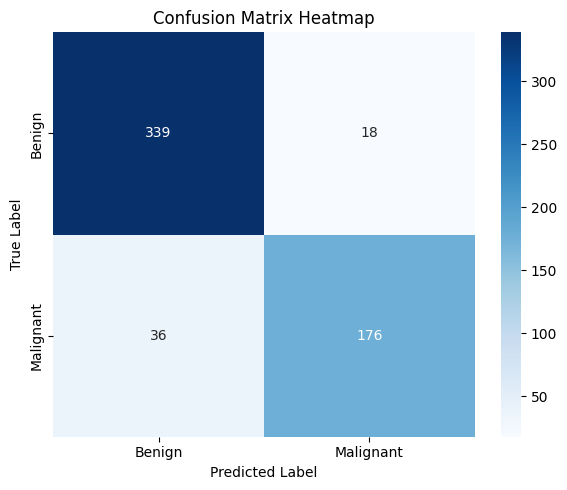

In [10]:
cm = np.array([[339, 18],
               [36, 176]])

class_names = ['Benign', 'Malignant']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

In [11]:
# Visualize metrics

TN = 339
FP = 18
FN = 36
TP = 176

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9051
Precision: 0.9072
Recall: 0.8302
F1 Score: 0.8670


The classification model demonstrates a good performance in distinguishing between benign and malignant breast tumors, as indicated by the confusion matrix. Performance metrics such as precision, recall, and F1-score support the model’s general effectiveness.

However, given the medical significance of the task, especially in cancer diagnosis, the model's performance,though it is solid, should be further improved. Of particular concern is the recall for malignant tumors, which measures the model’s ability to detect true positive cancer cases. A false negative can lead to delayed diagnosis and treatment, potentially worsening the patient’s prognosis.

In medical applications, maximizing recall is critical to ensure that as few malignant cases as possible go undetected. Although the model achieves a reasonably high recall, every missed positive case represents a potentially serious clinical oversight. This is why the model should be optimized to reduce false negatives while maintaining an acceptable balance with precision.
